In [1]:
# Check cancer status through k-NN
import pandas as pd
import numpy as np

In [2]:
# Data
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv"
df = pd.read_csv(url)
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
409,905501,B,12.270,17.92,78.41,466.1,0.08685,0.06526,0.03211,0.02653,...,14.10,28.88,89.00,610.2,0.1240,0.1795,0.13770,0.09532,0.3455,0.06896
30,853401,M,18.630,25.11,124.80,1088.0,0.10640,0.18870,0.23190,0.12440,...,23.15,34.01,160.50,1670.0,0.1491,0.4257,0.61330,0.18480,0.3444,0.09782
300,892438,M,19.530,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.10620,...,25.93,26.24,171.10,2053.0,0.1495,0.4116,0.61210,0.19800,0.2968,0.09929
524,917897,B,9.847,15.68,63.00,293.2,0.09492,0.08419,0.02330,0.02416,...,11.24,22.99,74.32,376.5,0.1419,0.2243,0.08434,0.06528,0.2502,0.09209
339,89812,M,23.510,24.27,155.10,1747.0,0.10690,0.12830,0.23080,0.14100,...,30.67,30.73,202.40,2906.0,0.1515,0.2678,0.48190,0.20890,0.2593,0.07738


In [3]:
# shape
df.shape

(569, 32)

In [4]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
# Let's equalize value counts of B and M
dropped = df[df.diagnosis == 'B'][:145]
data = df.drop(dropped.index, axis=0)
data.diagnosis.value_counts() # done

B    212
M    212
Name: diagnosis, dtype: int64

In [14]:
# Check NaN values
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [15]:
# Labeling 
data.diagnosis.replace({'M': 1, 'B': 0}, inplace=True)

In [16]:
# Drop Id columns we do not need it 
data.drop(columns='id', inplace=True)

# Visualisation and Correlation

In [17]:
corr_matrix = data.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1,0.708492,0.379661,0.720977,0.674984,0.39104,0.582598,0.708705,0.763842,0.374482,0.00710524,0.544658,0.00588489,0.526217,0.5097,0.0432607,0.321328,0.385605,0.469063,0.0283288,0.12298,0.752753,0.432255,0.759166,0.69715,0.439697,0.569862,0.685365,0.794023,0.416198,0.314558
radius_mean,0.708492,1,0.282718,0.997695,0.988126,0.201567,0.491984,0.70738,0.824975,0.174663,0.301539,0.696836,0.0738046,0.682827,0.738063,0.157735,0.243965,0.338522,0.442613,0.0438681,0.0104327,0.965439,0.244362,0.960917,0.938609,0.129722,0.368317,0.535759,0.732554,0.140879,0.0175673
texture_mean,0.379661,0.282718,1,0.288454,0.281211,0.0185074,0.201291,0.286625,0.264687,0.0697565,0.0798223,0.248836,0.41618,0.252104,0.226607,0.0619908,0.20306,0.21013,0.175025,0.0229448,0.0823106,0.313099,0.903957,0.319358,0.306,0.0900778,0.246173,0.291196,0.26282,0.0757294,0.0941797
perimeter_mean,0.720977,0.997695,0.288454,1,0.98663,0.241194,0.544973,0.747861,0.854427,0.214555,0.248921,0.70835,0.0617379,0.701308,0.746473,0.138988,0.289714,0.378735,0.474139,0.0201955,0.0508553,0.96486,0.251134,0.966247,0.938047,0.162734,0.412727,0.574696,0.761033,0.167947,0.0273894
area_mean,0.674984,0.988126,0.281211,0.98663,1,0.198787,0.478257,0.707492,0.820038,0.169925,0.283754,0.745291,0.0439235,0.731484,0.79932,0.109962,0.240403,0.338051,0.428754,0.0207899,0.0222773,0.957568,0.235968,0.953793,0.954248,0.12192,0.340758,0.512259,0.704878,0.112763,0.0299759
smoothness_mean,0.39104,0.201567,0.0185074,0.241194,0.198787,1,0.70284,0.58837,0.591202,0.595822,0.625751,0.299546,0.085201,0.297428,0.250158,0.307032,0.360544,0.353284,0.417859,0.199132,0.339327,0.242352,0.0593677,0.271284,0.225064,0.821239,0.516804,0.510042,0.557864,0.418674,0.540157
compactness_mean,0.582598,0.491984,0.201291,0.544973,0.478257,0.70284,1,0.88954,0.827197,0.669179,0.596469,0.477204,0.0621787,0.529224,0.434326,0.147646,0.751465,0.696408,0.657148,0.26992,0.561116,0.518604,0.220595,0.577864,0.487327,0.600099,0.859148,0.830824,0.816208,0.527514,0.685091
concavity_mean,0.708705,0.70738,0.286625,0.747861,0.707492,0.58837,0.88954,1,0.943716,0.555017,0.31863,0.632946,0.0769488,0.664837,0.621753,0.119743,0.657847,0.744504,0.671802,0.201276,0.431735,0.710669,0.284043,0.755771,0.689489,0.490019,0.740904,0.87587,0.871321,0.409317,0.478068
concave points_mean,0.763842,0.824975,0.264687,0.854427,0.820038,0.591202,0.827197,0.943716,1,0.503246,0.184116,0.690429,0.0405668,0.700987,0.676939,0.0492051,0.510395,0.57259,0.641446,0.135887,0.302884,0.827923,0.266451,0.855789,0.801514,0.47138,0.642802,0.768331,0.906397,0.370536,0.354016
symmetry_mean,0.374482,0.174663,0.0697565,0.214555,0.169925,0.595822,0.669179,0.555017,0.503246,1,0.532796,0.29245,0.12443,0.315232,0.223848,0.183697,0.466846,0.426491,0.411568,0.443749,0.369395,0.214562,0.10644,0.253817,0.195836,0.482041,0.539853,0.501884,0.490293,0.720058,0.491641


In [19]:
data.corrwith(data['diagnosis']).abs().sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.794023
concave points_mean        0.763842
perimeter_worst            0.759166
radius_worst               0.752753
perimeter_mean             0.720977
concavity_mean             0.708705
radius_mean                0.708492
area_worst                 0.697150
concavity_worst            0.685365
area_mean                  0.674984
compactness_mean           0.582598
compactness_worst          0.569862
radius_se                  0.544658
perimeter_se               0.526217
area_se                    0.509700
concave points_se          0.469063
smoothness_worst           0.439697
texture_worst              0.432255
symmetry_worst             0.416198
smoothness_mean            0.391040
concavity_se               0.385605
texture_mean               0.379661
symmetry_mean              0.374482
compactness_se             0.321328
fractal_dimension_worst    0.314558
fractal_dimension_se       0.122980
smoothness_se              0

In [22]:
# Drop last 4 less correlation columns
data = data.drop(columns=['smoothness_se', 'symmetry_se', 'fractal_dimension_mean', 'texture_se'])

# ML 

In [26]:
# Preprocessing
x = data.drop('diagnosis', axis=1).values
y = data.diagnosis

In [27]:
# Standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [28]:
# Train, Test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=30)


In [55]:
# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4) # k

knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [56]:
y_predict = knn.predict(x_test)

# Check Accuracy

In [37]:
# Jaccard Index
# from sklearn.metrics import jaccard_score
# jaccard_score(y_test, y_predict)

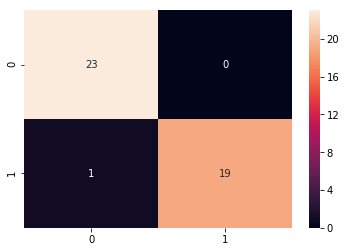

In [57]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [38]:
confusion_matrix(y_test, y_predict)

array([[23,  0],
       [ 1, 19]])

In [41]:
# Precision, recall, F1
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision}\n{recall}\n{f1}\n{accuracy}") 

1.0
0.95
0.9743589743589743
0.9767441860465116


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98        23
          1       1.00      0.95      0.97        20

avg / total       0.98      0.98      0.98        43



In [59]:
# Check with Cross Validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X=x, y=y, cv=5)

from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y, predict))

Classification Report: 
              precision    recall  f1-score   support

          0       0.94      1.00      0.97       212
          1       0.99      0.94      0.97       212

avg / total       0.97      0.97      0.97       424



# Finding best K

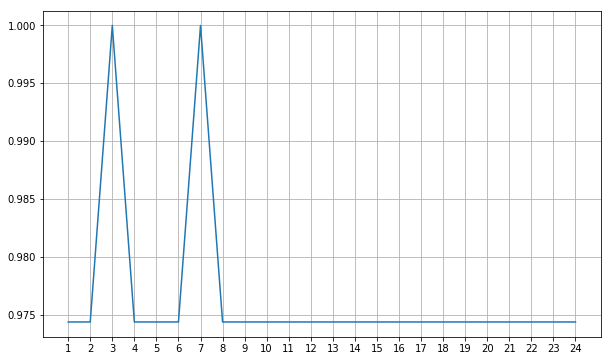

In [46]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    f1.append(f1_score(y_test, y_predict))
plt.figure(figsize=(10,6))
plt.plot(range(1,25), f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [48]:
# with Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,25)}
knn_gcsv = GridSearchCV(knn, param_grid, cv=5)
knn_gcsv.fit(x,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=24, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
knn_gcsv.cv_results_['rank_test_score']

array([17, 17, 12,  1,  2, 12,  8,  5,  8,  8,  3,  8,  3,  5,  5, 12, 17,
       17, 12, 23, 17, 12, 17, 23], dtype=int32)

In [51]:
knn_gcsv.best_params_

{'n_neighbors': 4}

In [52]:
knn_gcsv.best_score_

0.9669811320754716

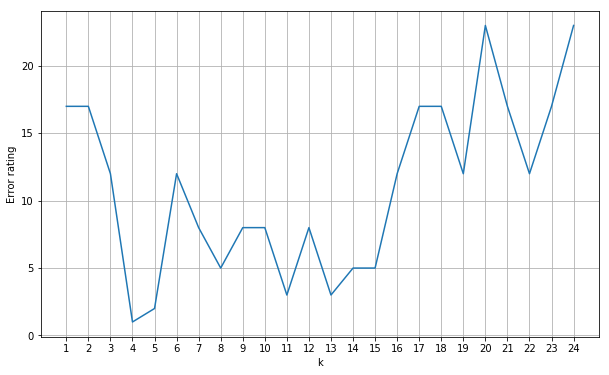

In [54]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gcsv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Error rating")
plt.grid()
plt.show()